##                                             **Project Title: Retail Sales Data Analysis and Prediction**


## **Problem Statement**
1) The retail industry is a highly competitive sector where businesses need to optimize their operations, marketing strategies, and inventory management to stay ahead. A major factor influencing retail success is the accurate prediction of sales, which can help in better decision-making, inventory management, and customer targeting.

2) This project aims to analyze a retail sales dataset and build a machine learning model to predict the total sales for each transaction based on various factors, such as the product category, customer demographics (age, gender), quantity sold, and price per unit. The goal is to provide insights into the factors that drive sales and develop a predictive model that can help businesses forecast future sales with high accuracy.

## **Overall Information**
---> In this project, we will work with a retail sales dataset that includes the following columns:

1) Gender: The gender of the customer (Male/Female).

2) Product Category: The type of product purchased (e.g., Beauty, Clothing, Electronics).

3) Age: The age of the customer.

4) Quantity: The quantity of products purchased.

5) Price per Unit: The price of a single unit of the product.

6) Total_Sales: The total sales amount for the transaction.

--> The analysis will focus on exploring relationships between the features (independent variables) and the target variable (Total_Sales). We will also use machine learning algorithms to predict sales and evaluate the performance of various models, including Ridge and Lasso Regression, Random Forest, and XGBoost.


## **Objectives**
1) Data Exploration and Preprocessing: Explore the data to check for missing values, outliers, and relationships between variables. Clean and preprocess the data for modeling.

2) Visualization: Create visualizations to understand sales trends, product category performance, and demographic breakdowns (e.g., gender-based sales comparison).

3) Feature Engineering: Create new features like age segments or any other derived variable that could improve the model's prediction capabilities.

4) Modeling: Build and evaluate different machine learning models, such as Ridge Regression, Lasso Regression, Random Forest, and XGBoost, to predict sales and assess which model performs the best.

5) Cross-validation and Hyperparameter Tuning: Use techniques like cross-validation and grid search to tune hyperparameters and improve model performance.

## **Libraries Used**

1) Python: Programming language used for data analysis and machine learning.

2) Pandas: Data manipulation and analysis library.

3) Matplotlib / Seaborn: Libraries for data visualization.

4) Scikit-learn: Library for machine learning algorithms and tools.

5) XGBoost: Gradient boosting algorithm for machine learning.

6) Random Forest: Ensemble method for regression tasks.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# To ignore all warnings
warnings.filterwarnings("ignore")


In [2]:
df=pd.read_csv("retail_sales_dataset.csv")
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [3]:
df.dtypes

Transaction ID       int64
Date                object
Customer ID         object
Gender              object
Age                  int64
Product Category    object
Quantity             int64
Price per Unit       int64
Total Amount         int64
dtype: object

In [4]:
# Ensure 'Date' column is in datetime format

df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


In [5]:
print(df['Gender'].unique())  # This will show all unique values in the 'Gender' column


['Male' 'Female']


In [6]:
print(df['Gender'].isnull().sum())


0


In [7]:
df['Gender'] = df['Gender'].str.strip()  # Remove any leading/trailing spaces
df['Gender'] = df['Gender'].str.capitalize()  # Ensure consistent capitalization (e.g., 'male' becomes 'Male')


In [8]:
# Fill missing values with a placeholder like 'Unknown'
df['Gender'] = df['Gender'].fillna('Unknown')


In [9]:
# Map 'Male' to 1, 'Female' to 0, and any other values to -1 (e.g., 'Unknown')
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0}).fillna(-1)


In [10]:
# Verify the result
print(df['Gender'].unique())  # Expected output: [1, 0, -1]


[1 0]


In [11]:
df.columns = df.columns.str.replace(' ', '_')  # Replace spaces with underscores


In [12]:
df.head()  # View the first few rows to verify


,Transaction_ID,Date,Customer_ID,Gender,Age,Product_Category,Quantity,Price_per_Unit,Total_Amount
0,1,2023-11-24,CUST001,1,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,0,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,1,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,1,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,1,30,Beauty,2,50,100


In [13]:
from sklearn.preprocessing import LabelEncoder

# Initialize the label encoder
label_encoder = LabelEncoder()

# Encode the 'Product Category' column
df['Product_Category'] = label_encoder.fit_transform(df['Product_Category'])

# View the result
print(df.head())


   Transaction_ID       Date Customer_ID  Gender  Age  Product_Category  \
0               1 2023-11-24     CUST001       1   34                 0   
1               2 2023-02-27     CUST002       0   26                 1   
2               3 2023-01-13     CUST003       1   50                 2   
3               4 2023-05-21     CUST004       1   37                 1   
4               5 2023-05-06     CUST005       1   30                 0   

   Quantity  Price_per_Unit  Total_Amount  
0         3              50           150  
1         2             500          1000  
2         1              30            30  
3         1             500           500  
4         2              50           100  


## Calculate Total Sales and Quantity: For each Product Category, calculate:
Total Sales = Sum of (Quantity * Price per Unit)

In [14]:
df['Total_Sales'] = df['Quantity'] * df['Price_per_Unit']


In [12]:
df.head()

,Transaction_ID,Date,Customer_ID,Gender,Age,Product_Category,Quantity,Price_per_Unit,Total_Amount,Total_Sales
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,100


In [16]:
df.dtypes

Transaction_ID               int64
Date                datetime64[ns]
Customer_ID                 object
Gender                       int64
Age                          int64
Product_Category             int32
Quantity                     int64
Price_per_Unit               int64
Total_Amount                 int64
Total_Sales                  int64
dtype: object

In [15]:
df=df.dropna()

In [16]:
df=df.drop_duplicates()

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction_ID    1000 non-null   int64         
 1   Date              1000 non-null   datetime64[ns]
 2   Customer_ID       1000 non-null   object        
 3   Gender            1000 non-null   int64         
 4   Age               1000 non-null   int64         
 5   Product_Category  1000 non-null   int32         
 6   Quantity          1000 non-null   int64         
 7   Price_per_Unit    1000 non-null   int64         
 8   Total_Amount      1000 non-null   int64         
 9   Total_Sales       1000 non-null   int64         
dtypes: datetime64[ns](1), int32(1), int64(7), object(1)
memory usage: 74.3+ KB


## **Group by Product Category and calculate total sales and total quantity**

In [14]:
category_performance = df.groupby('Product_Category').agg(
    total_sales=('Total_Sales', 'sum'),
    total_quantity=('Quantity', 'sum')
).reset_index()

In [15]:
category_performance = category_performance.sort_values(by='total_sales', ascending=False)

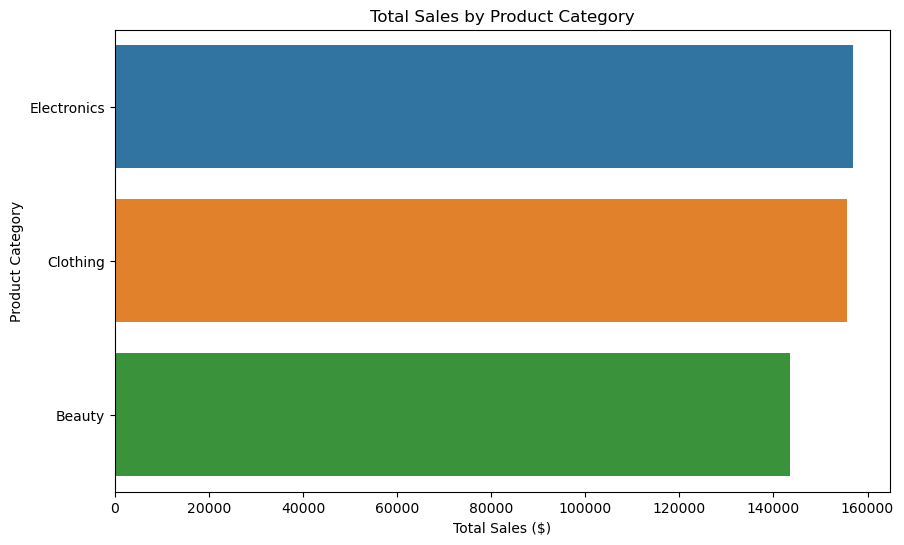

In [16]:
plt.figure(figsize=(10, 6))
sns.barplot(x='total_sales', y='Product_Category', data=category_performance)
plt.title('Total Sales by Product Category')
plt.xlabel('Total Sales ($)')
plt.ylabel('Product Category')
plt.show()



# **INSIGHTS**

## **1. Electronics Dominates Total Sales**
--> Electronics has the highest total sales among all product categories, significantly outpacing other categories.

--> This could indicate a high demand for electronics or premium pricing contributing to the revenue.

## **2. Clothing Shows Strong Sales**
--> Clothing ranks second in total sales, close to electronics but still lower.
--> This category might have consistent demand, likely contributing to steady revenues.

## **3. Beauty Category Lags Behind**
--> The beauty category has the lowest total sales.
--> This might indicate lower demand, lower average price per product, or less marketing focus.

## **Recommendations:**
1) Electronics: Maintain focus and invest more in this category to sustain its growth.
2) Clothing: Explore strategies to push this category's sales further, such as targeted promotions.
3) Beauty: Investigate reasons for lower sales—consider promotions, discounts, or bundling strategies to attract more customers.


In [65]:
# Plot Total Quantity Sold per Product Category

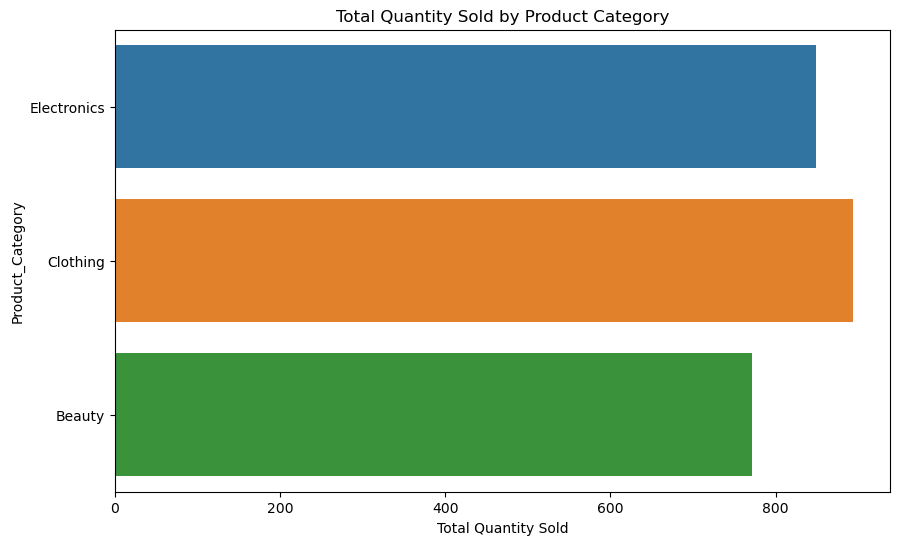

In [17]:
plt.figure(figsize=(10, 6))
sns.barplot(x='total_quantity', y='Product_Category', data=category_performance)
plt.title('Total Quantity Sold by Product Category')
plt.xlabel('Total Quantity Sold')
plt.ylabel('Product_Category')
plt.show()

## **1. Electronics Leads in Total Quantity Sold**

--> Electronics has the highest quantity sold, indicating strong customer demand or popularity for this category.

## **2. Clothing Follows Closely**
--> Clothing shows a high quantity sold, nearly close to Electronics, suggesting consistent sales volumes and customer interest.

## **3. Beauty Sells the Least Quantity**
--> The beauty category has the lowest quantity sold.

-->This may imply fewer purchases due to lower demand or possibly higher competition in this segment.

## **4. Comparison to Sales Revenue (Previous Chart)**

--> While Electronics had the highest total sales and quantity sold, it suggests high-value items are driving both revenue and units sold.

--> Clothing shows high total quantity sold but comparatively lower revenue, suggesting lower average price per unit.

--> Beauty, despite selling the least quantity, might still generate decent sales if the price per unit is higher.

## **Recommendations:**

1) Electronics: Continue to capitalize on its demand by maintaining inventory and marketing.
   
2) Clothing: Increase focus on pricing strategies to improve revenue while maintaining high volumes.
   
3) Beauty: Explore targeted marketing, bundle offers, or discounts to boost sales and quantities sold.

In [16]:
df['Month'] = df['Date'].dt.to_period('M')

In [17]:
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Total_Sales,Month
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,150,2023-11
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,1000,2023-02
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,30,2023-01
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,500,2023-05
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,100,2023-05


In [18]:
df.dtypes

Transaction ID               int64
Date                datetime64[ns]
Customer ID                 object
Gender                      object
Age                          int64
Product Category            object
Quantity                     int64
Price per Unit               int64
Total Amount                 int64
Total_Sales                  int64
Month                    period[M]
dtype: object

In [19]:
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Total_Sales,Month
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,150,2023-11
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,1000,2023-02
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,30,2023-01
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,500,2023-05
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,100,2023-05


In [20]:
df.dtypes

Transaction ID               int64
Date                datetime64[ns]
Customer ID                 object
Gender                      object
Age                          int64
Product Category            object
Quantity                     int64
Price per Unit               int64
Total Amount                 int64
Total_Sales                  int64
Month                    period[M]
dtype: object

In [21]:
monthly_trends = df.groupby(['Month', 'Product Category']).agg(
    total_sales=('Total_Sales', 'sum'),
    total_quantity=('Quantity', 'sum')
).reset_index()

In [22]:
# Top 5 categories by total sales for trend analysis
top_categories = category_performance.head(5)['Product Category']
top_trends = monthly_trends[monthly_trends['Product Category'].isin(top_categories)]

if top_trends['Month'].dtype.name == 'period[M]':
    top_trends['Month'] = top_trends['Month'].astype('datetime64[ns]')


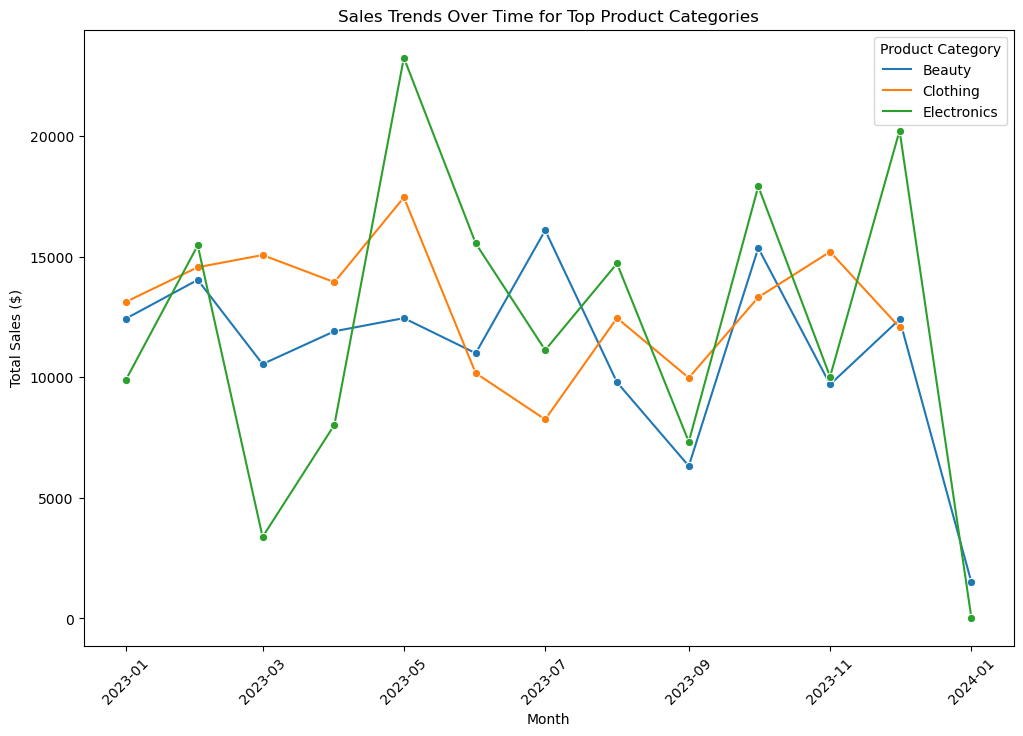

In [23]:
# Plot sales trends over time for top categories
plt.figure(figsize=(12, 8))
sns.lineplot(data=top_trends, x='Month', y='total_sales', hue='Product Category', marker='o')
plt.title('Sales Trends Over Time for Top Product Categories')
plt.xlabel('Month')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=45)
plt.legend(title='Product Category')
plt.show()

# **Insights** #

## **Seasonal Peaks and Drops:**

Electronics experienced significant volatility, with noticeable peaks in May 2023 (highest point, over $22,000) and December 2023.
However, it also witnessed dramatic drops, especially in February 2023, September 2023, and January 2024 (lowest point close to $0).

## **Clothing Sales Stability:**

1) Clothing showed relatively consistent performance compared to the other categories.
2) Moderate peaks occurred in May 2023 and November 2023, with sales ranging between $10,000 to $17,000.
3) The category had fewer extreme highs or lows, suggesting steadier demand.

## **Beauty Sales Trend:**

1) Beauty products exhibited a steady baseline but occasional peaks, such as in July 2023 and October 2023.
2) Sales dropped in September 2023 but recovered quickly afterward.
3) Notably, the overall sales for Beauty appear lower compared to Electronics and Clothing.

## **End-of-Year Surge:**

Both Electronics and Clothing experienced an uptick in sales in November and December 2023, likely due to holiday demand or promotions.
Electronics had the largest spike during this time.

## **Electronics Dominates Overall:**

1) Despite its volatility, Electronics consistently reached the highest sales peaks, indicating strong demand during specific months.

## **Sales Drop in January 2024:**

All categories, especially Electronics, saw a sharp decline in sales in January 2024. This drop could reflect post-holiday season fatigue or reduced consumer spending.

## **Key Takeaways:**

1) Electronics: High demand but inconsistent. Promotions during May and December likely drove significant spikes.
   
2) Clothing: Stable with smaller fluctuations, making it a reliable performer.
   
3) Beauty: Moderate demand, with occasional peaks suggesting seasonal interest.
   
## **Actionable Insight:**

1) Focus on optimizing inventory for Electronics during peak months (May and December).
   
2)Leverage promotional campaigns to boost sales for Clothing and Beauty in slower months like September.

## **Customer Segmentation Analysis:**

In [24]:
bins = [0, 18, 25, 35, 45, 55, 65, 100]  # Define age ranges
labels = ['0-17', '18-24', '25-34', '35-44', '45-54', '55-64', '65+']  # Add the missing label for the first bin
df['Age_Segment'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)


In [25]:
# Step 2: Segmentation by Age and Product Category (Total Sales)
age_category_performance = df.groupby(['Age_Segment', 'Product Category']).agg(
    total_sales=('Total_Sales', 'sum'),
    total_quantity=('Quantity', 'sum')
).reset_index()

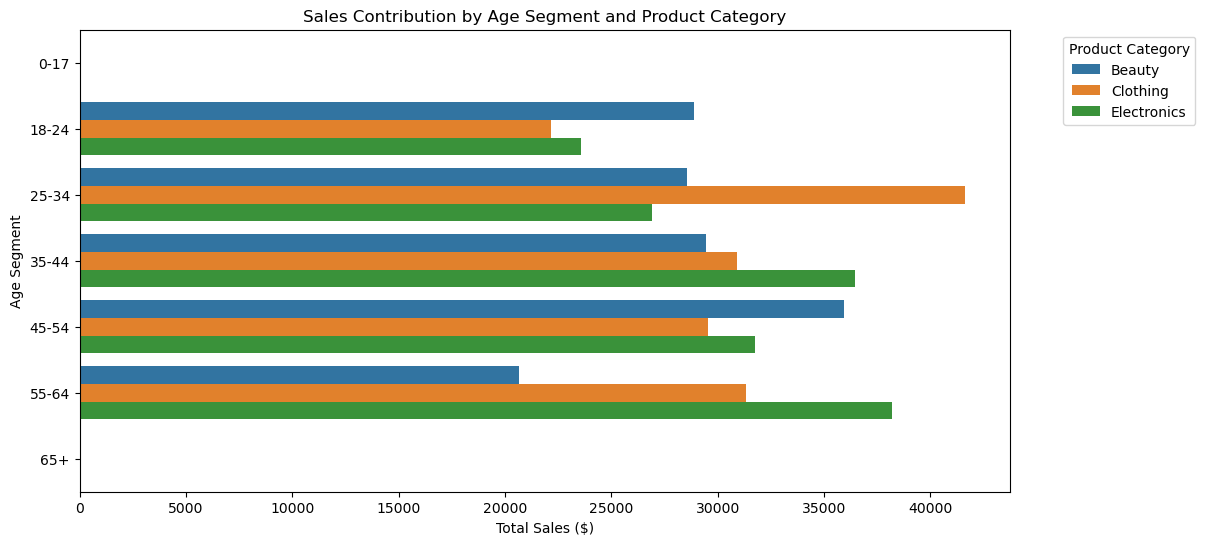

In [26]:
# Visualize the contribution of each age segment to sales by category
plt.figure(figsize=(12, 6))
sns.barplot(x='total_sales', y='Age_Segment', hue='Product Category', data=age_category_performance)
plt.title('Sales Contribution by Age Segment and Product Category')
plt.xlabel('Total Sales ($)')
plt.ylabel('Age Segment')
plt.legend(title='Product Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [27]:
# Step 3: Segmentation by Gender and Product Category (Total Sales)
gender_category_performance = df.groupby(['Gender', 'Product Category']).agg(
    total_sales=('Total_Sales', 'sum'),
    total_quantity=('Quantity', 'sum')
).reset_index()

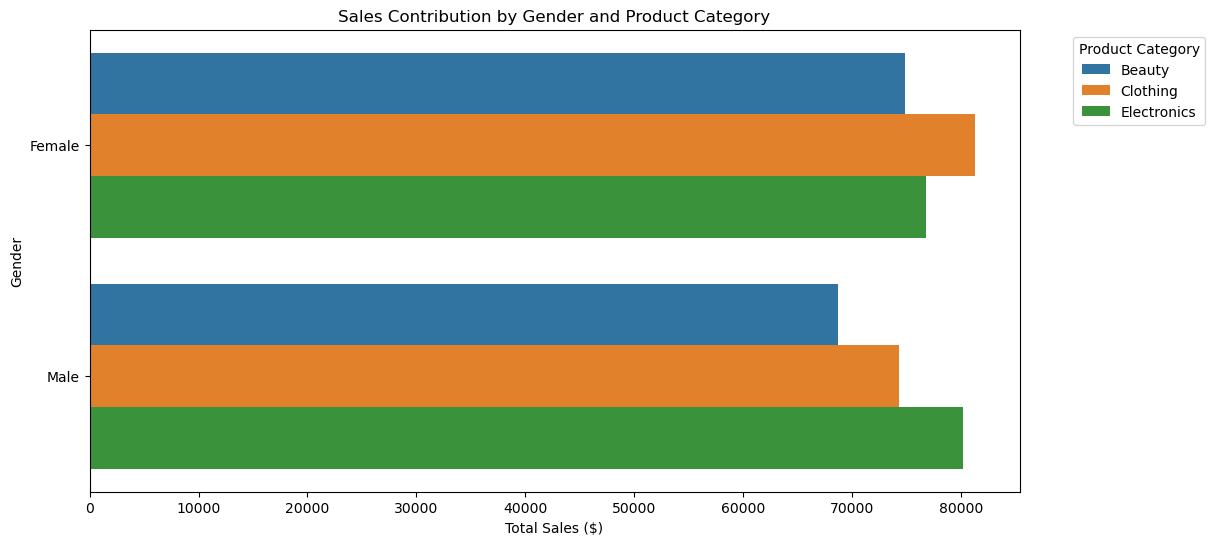

In [28]:
# Visualize the contribution of each gender segment to sales by category
plt.figure(figsize=(12, 6))
sns.barplot(x='total_sales', y='Gender', hue='Product Category', data=gender_category_performance)
plt.title('Sales Contribution by Gender and Product Category')
plt.xlabel('Total Sales ($)')
plt.ylabel('Gender')
plt.legend(title='Product Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [19]:
# Step 4: Segmentation by Total Sales (Top Spenders)
top_spenders = df.groupby('Customer_ID').agg(
    total_spent=('Total_Sales', 'sum')
).reset_index()

In [20]:
top_spenders = top_spenders.sort_values(by='total_spent', ascending=False)

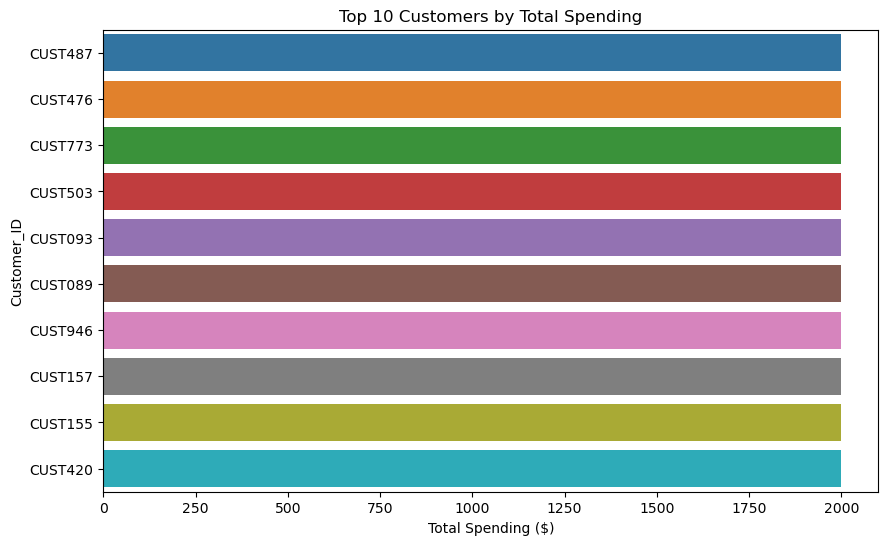

In [22]:
# Visualize top spenders (Top 10)
plt.figure(figsize=(10, 6))
sns.barplot(x='total_spent', y='Customer_ID', data=top_spenders.head(10))
plt.title('Top 10 Customers by Total Spending')
plt.xlabel('Total Spending ($)')
plt.ylabel('Customer_ID')
plt.show()

## Hypothesis Testing

## Gender and Product Category Sales:

Null Hypothesis (H₀): There is no significant difference in sales by gender for each product category.
Alternative Hypothesis (H₁): There is a significant difference in sales by gender for at least one product category.
Age and Total Sales:

Null Hypothesis (H₀): There is no significant difference in total sales across different age groups.
Alternative Hypothesis (H₁): There is a significant difference in total sales across different age groups.

In [23]:
from scipy import stats

gender_sales_per_category = df.groupby(['Gender', 'Product_Category'])['Total_Sales'].sum().unstack()
gender_sales_per_category = gender_sales_per_category.dropna()



In [24]:
gender_sales_per_category

Product_Category,Beauty,Clothing,Electronics
Gender,,,
Female,74830,81275,76735
Male,68685,74305,80170


In [26]:
# Assuming 'df' is your raw dataset
gender_sales_per_category = df.groupby(['Gender', 'Product_Category'])['Total_Sales'].sum().unstack()

# Conduct ANOVA for each product category
for category in gender_sales_per_category.columns:
    male_sales = df[(df['Gender'] == 'Male') & (df['Product_Category'] == category)]['Total_Sales']
    female_sales = df[(df['Gender'] == 'Female') & (df['Product_Category'] == category)]['Total_Sales']
    
    # ANOVA: Testing if the mean sales differ by gender in each product category
    f_stat, p_value = stats.f_oneway(male_sales, female_sales)
    
    print(f"ANOVA for {category} - p-value: {p_value}")
    if p_value < 0.05:
        print(f"Reject null hypothesis: Significant difference in sales by gender for {category}")
    else:
        print(f"Fail to reject null hypothesis: No significant difference in sales by gender for {category}")


ANOVA for Beauty - p-value: 0.574237609306192
Fail to reject null hypothesis: No significant difference in sales by gender for Beauty
ANOVA for Clothing - p-value: 0.42190191286334755
Fail to reject null hypothesis: No significant difference in sales by gender for Clothing
ANOVA for Electronics - p-value: 0.8108416846634852
Fail to reject null hypothesis: No significant difference in sales by gender for Electronics


In [27]:
from scipy.stats import levene

# Levene's test for homogeneity of variances
stat, p_value = levene(male_sales, female_sales)
print(f"Levene's Test p-value: {p_value}")
if p_value < 0.05:
    print("Reject null hypothesis: The variances are significantly different.")
else:
    print("Fail to reject null hypothesis: The variances are equal.")


Levene's Test p-value: 0.6863609427346782
Fail to reject null hypothesis: The variances are equal.


In [28]:
df['Gender']

0        Male
1      Female
2        Male
3        Male
4        Male
        ...  
995      Male
996      Male
997    Female
998    Female
999      Male
Name: Gender, Length: 1000, dtype: object

In [18]:
df.head()

,Transaction_ID,Date,Customer_ID,Gender,Age,Product_Category,Quantity,Price_per_Unit,Total_Amount,Total_Sales
0,1,2023-11-24,CUST001,1,34,0,3,50,150,150
1,2,2023-02-27,CUST002,0,26,1,2,500,1000,1000
2,3,2023-01-13,CUST003,1,50,2,1,30,30,30
3,4,2023-05-21,CUST004,1,37,1,1,500,500,500
4,5,2023-05-06,CUST005,1,30,0,2,50,100,100


In [19]:
df['Gender'].value_counts()

Gender
0    510
1    490
Name: count, dtype: int64

Ridge Regression Evaluation:
MAE: 172.66715957122116
MSE: 41836.325830963746
R-squared: 0.8570818093396863

Lasso Regression Evaluation:
MAE: 171.47151961120966
MSE: 41723.82236801634
R-squared: 0.8574661354258828

Random Forest Regression Evaluation:
MAE: 0.0
MSE: 0.0
R-squared: 1.0

XGBoost Regression Evaluation:
MAE: 9.217262268066407e-05
MSE: 1.5415298548759892e-08
R-squared: 0.9999999999999474

Random Forest CV Scores: [1. 1. 1. 1. 1.]
XGBoost CV Scores: [1. 1. 1. 1. 1.]


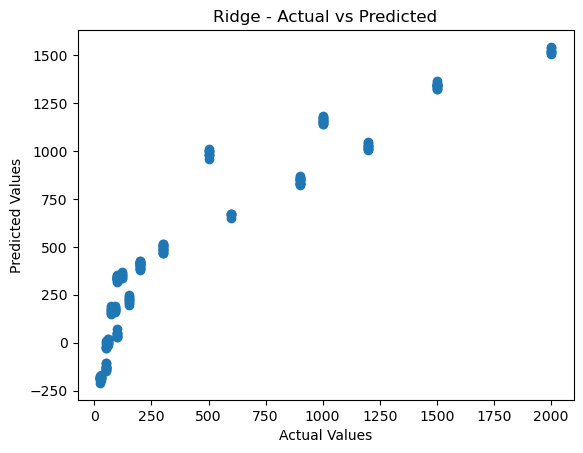

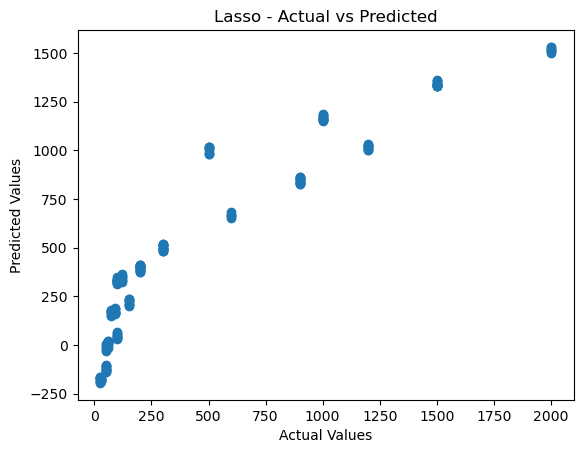

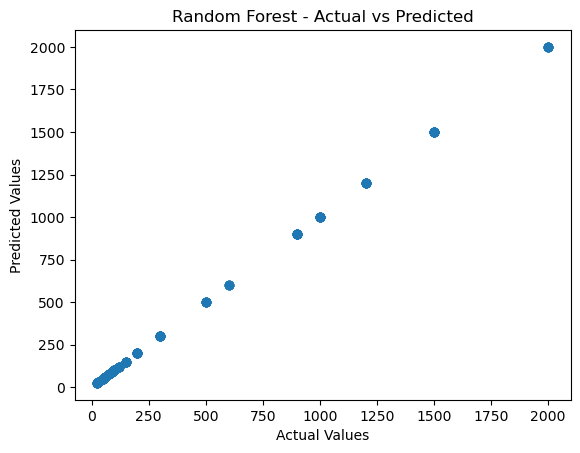

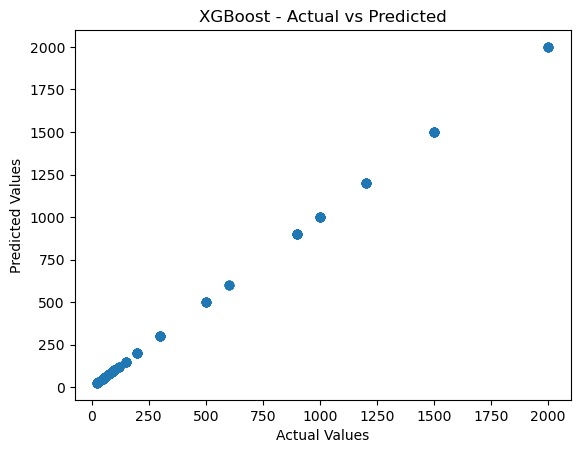

In [20]:
# Import necessary libraries
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.linear_model import Ridge, Lasso

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV, cross_val_score
import matplotlib.pyplot as plt
import numpy as np

# Train-Test Split
from sklearn.model_selection import train_test_split

# Define your X and y
X = df[['Gender', 'Product_Category', 'Age', 'Quantity', 'Price_per_Unit']]
y = df['Total_Sales']

# Convert categorical columns to numerical using one-hot encoding
X = pd.get_dummies(X, drop_first=True)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Ridge and Lasso Regression (from your previous implementation) ---
from sklearn.linear_model import Ridge, Lasso

# Ridge and Lasso Model Evaluation
ridge_model = Ridge(alpha=10)
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)
print("Ridge Regression Evaluation:")
print(f"MAE: {mean_absolute_error(y_test, y_pred_ridge)}")
print(f"MSE: {mean_squared_error(y_test, y_pred_ridge)}")
print(f"R-squared: {r2_score(y_test, y_pred_ridge)}")

lasso_model = Lasso(alpha=10)
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)
print("\nLasso Regression Evaluation:")
print(f"MAE: {mean_absolute_error(y_test, y_pred_lasso)}")
print(f"MSE: {mean_squared_error(y_test, y_pred_lasso)}")
print(f"R-squared: {r2_score(y_test, y_pred_lasso)}")

# --- Random Forest Regressor ---
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print("\nRandom Forest Regression Evaluation:")
print(f"MAE: {mean_absolute_error(y_test, y_pred_rf)}")
print(f"MSE: {mean_squared_error(y_test, y_pred_rf)}")
print(f"R-squared: {r2_score(y_test, y_pred_rf)}")

# --- XGBoost Regressor ---
xgb_model = xgb.XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
print("\nXGBoost Regression Evaluation:")
print(f"MAE: {mean_absolute_error(y_test, y_pred_xgb)}")
print(f"MSE: {mean_squared_error(y_test, y_pred_xgb)}")
print(f"R-squared: {r2_score(y_test, y_pred_xgb)}")

# --- Cross-Validation for Random Forest and XGBoost ---
rf_cv_scores = cross_val_score(rf_model, X, y, cv=5)
xgb_cv_scores = cross_val_score(xgb_model, X, y, cv=5)

print("\nRandom Forest CV Scores:", rf_cv_scores)
print("XGBoost CV Scores:", xgb_cv_scores)

# --- Visualizing the Results ---

# Function to plot the actual vs predicted values
def plot_actual_vs_predicted(y_true, y_pred, model_name):
    plt.scatter(y_true, y_pred)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(f'{model_name} - Actual vs Predicted')
    plt.show()

# Plot for each model
plot_actual_vs_predicted(y_test, y_pred_ridge, "Ridge")
plot_actual_vs_predicted(y_test, y_pred_lasso, "Lasso")
plot_actual_vs_predicted(y_test, y_pred_rf, "Random Forest")
plot_actual_vs_predicted(y_test, y_pred_xgb, "XGBoost")


In [30]:
df.head()

,Transaction_ID,Date,Customer_ID,Gender,Age,Product_Category,Quantity,Price_per_Unit,Total_Amount,Total_Sales
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,100


In [22]:
# Assuming df_encoded is the encoded training data from before.
# And that rf_best_model is the best model selected from GridSearchCV
# Assuming df_encoded is the encoded training data from before.
# And that xgb_best_model is the best XGBoost model selected from GridSearchCV

# Assuming you've already defined and trained your XGBoost model (xgb_best_model) earlier

# Example of new data
new_data = pd.DataFrame({
    'Gender': ['Male', 'Female'],
    'Product_Category': ['Electronics', 'Clothing'],
    'Age': [30, 22],
    'Quantity': [5, 10],
    'Price_per_Unit': [150, 25]
})

# Apply one-hot encoding (same as done during training)
new_data_encoded = pd.get_dummies(new_data, drop_first=True)

# Ensure the new data has the same columns as the training set
# Reindexing to match the training set columns (fill missing columns with 0)
new_data_encoded = new_data_encoded.reindex(columns=X_train.columns, fill_value=0)

# Predict using the fitted XGBoost model (assuming xgb_best_model is already trained)
new_predictions_xgb = xgb_model.predict(new_data_encoded)

print("Predictions for New Data using XGBoost:", new_predictions_xgb)






Predictions for New Data using XGBoost: [200.       99.99996]


In [24]:
import joblib

# Save the trained model to a file
joblib.dump(rf_model, 'xgboost_model.pkl')

# To load the model later:
# loaded_model = joblib.load('xgboost_model.pkl')


['xgboost_model.pkl']

In [ ]:
''# Import necessary libraries
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.linear_model import Ridge, Lasso

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV, cross_val_score
import matplotlib.pyplot as plt
import numpy as np

# Train-Test Split
from sklearn.model_selection import train_test_split

# Define your X and y
X = df[['Gender', 'Product_Category', 'Age', 'Quantity', 'Price_per_Unit']]
y = df['Total_Sales']

# Convert categorical columns to numerical using one-hot encoding
X = pd.get_dummies(X, drop_first=True)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Ridge and Lasso Regression (from your previous implementation) ---
from sklearn.linear_model import Ridge, Lasso

# Ridge and Lasso Model Evaluation
ridge_model = Ridge(alpha=10)
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)
print("Ridge Regression Evaluation:")
print(f"MAE: {mean_absolute_error(y_test, y_pred_ridge)}")
print(f"MSE: {mean_squared_error(y_test, y_pred_ridge)}")
print(f"R-squared: {r2_score(y_test, y_pred_ridge)}")

lasso_model = Lasso(alpha=10)
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)
print("\nLasso Regression Evaluation:")
print(f"MAE: {mean_absolute_error(y_test, y_pred_lasso)}")
print(f"MSE: {mean_squared_error(y_test, y_pred_lasso)}")
print(f"R-squared: {r2_score(y_test, y_pred_lasso)}")

# --- Random Forest Regressor ---
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print("\nRandom Forest Regression Evaluation:")
print(f"MAE: {mean_absolute_error(y_test, y_pred_rf)}")
print(f"MSE: {mean_squared_error(y_test, y_pred_rf)}")
print(f"R-squared: {r2_score(y_test, y_pred_rf)}")

# --- XGBoost Regressor ---
xgb_model = xgb.XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
print("\nXGBoost Regression Evaluation:")
print(f"MAE: {mean_absolute_error(y_test, y_pred_xgb)}")
print(f"MSE: {mean_squared_error(y_test, y_pred_xgb)}")
print(f"R-squared: {r2_score(y_test, y_pred_xgb)}")

# --- Cross-Validation for Random Forest and XGBoost ---
rf_cv_scores = cross_val_score(rf_model, X, y, cv=5)
xgb_cv_scores = cross_val_score(xgb_model, X, y, cv=5)

print("\nRandom Forest CV Scores:", rf_cv_scores)
print("XGBoost CV Scores:", xgb_cv_scores)

# --- Visualizing the Results ---

# Function to plot the actual vs predicted values
def plot_actual_vs_predicted(y_true, y_pred, model_name):
    plt.scatter(y_true, y_pred)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(f'{model_name} - Actual vs Predicted')
    plt.show()

# Plot for each model
plot_actual_vs_predicted(y_test, y_pred_ridge, "Ridge")
plot_actual_vs_predicted(y_test, y_pred_lasso, "Lasso")
plot_actual_vs_predicted(y_test, y_pred_rf, "Random Forest")
plot_actual_vs_predicted(y_test, y_pred_xgb, "XGBoost")